# Gathering Data

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json

df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [2]:
df_enhanced.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth) 

In [4]:
# this cell queries the Twitter API and put all the information in error_ids.txt and tweet_json.txt. 

tweet_data = {}

for tweet_id in df_enhanced.tweet_id:
    try:
        response = api.get_status(tweet_id, wait_on_rate_limit=True,
                                  wait_on_rate_limit_notify=True)._json
        tweet_data[response['id']] = response._json
    except:
        with open('error_ids.txt', 'w+') as f:
            f.write(str(tweet_id))

with open('tweet_json.txt', 'w+') as file:
    json.dump(tweet_data, file)

In [5]:
#Creates a DataFrame from the url of image predictions provided by Udacity via API

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_original = pd.read_csv(url, sep='\t')



In [6]:
image_predictions_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
image_predictions_original.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
tweet_data = {}
with open('tweet_json.txt') as f:
    tweet = f.readline()
    test = json.loads(tweet)
    for key in test:
        tweet_data[key] = {'id' : test[key]['id'],
                           'favorite_count' : test[key]['favorite_count'],
                           'retweet_count': test[key]['retweet_count']}

tweet_data_original = pd.DataFrame.from_dict(tweet_data, 'index')
tweet_data_original.reset_index(inplace=True)
tweet_data_original.drop('index', axis = 1, inplace = True)

# Gathered Data

In [9]:
# data given at the beginning of the project
# df_enhanced

# all the tweet data
# tweet_data_original

# tweets that had errors during gathering
# 'error_ids.txt'

# image predictions data
# image_predictions_original

In [10]:
# downloaded all the data sets to view in Excel
df_enhanced.to_csv('df_enhanced.csv')
tweet_data_df.to_csv('tweet_data_df.csv')
image_predictions_df.to_csv('image_predictions_df.csv')

## Define

### Quality

#### df_enhanced:
* Contains more lines of data than tweet_data_df and image_predictions_df DONE
* 2 columns are strings and not timestamps DONE
    * timestamps
    * retweeted status timestamp
* tweet id is an integer not a string DONE
* 4 columns are floats and not strings DONE
    * in_reply_to_status_id
    * in_reply_to_user_id
    * retweeted_status_id
    * retweeted_status_user_id
* retweets should not be in this set DONE
* source column contains url tags still

    

#### tweet_data_df:
* id is an int not a string DONE


#### image_predictions_df:
* tweet id is an int not a string DONE
* dog type is a string not category (once types are combined into single column) DONE

### Tidiness

#### df_enhanced:
* Does not contain favorite count or retweet count DONE

#### tweet_data_df:

#### image_predictions_df:
* It is difficult to know what kind of dog it is from the predictions set due to answers being in 3 diferrent columns DONE
* after removing retweets the columns pertaining to retweets should be removed DONE




# Code for Quality

### df_enhanced

In [11]:
df_clean = df_enhanced.copy()
tweet_data_df = tweet_data_original.copy()
image_predictions_df = image_predictions_original.copy()

#### remove retweets

In [12]:

df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()==True].index, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [13]:
#### convert timestamp and retweeted_timestamp to datetime

In [14]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')
df_clean['retweeted_status_timestamp'] = pd.to_datetime(df_clean['retweeted_status_timestamp'], format = '%Y-%m-%d %H:%M:%S', errors='coerce')


In [15]:
#### Convert tweet_id to str

In [16]:
df_clean['tweet_id'] = df_clean['tweet_id'].apply(str)

In [17]:
#### Convert 4 columns to str

In [18]:
float_columns = ['in_reply_to_status_id',
                 'in_reply_to_user_id',
                 'retweeted_status_id',
                 'retweeted_status_user_id']

for item in float_columns:
    df_clean[item] = df_clean[item].fillna(0.0) #cannot convert to NaN to int
    df_clean[item] = df_clean[item].apply(int) #must convert to int first to avoid "8.3244e07" type strings
    df_clean[item] = df_clean[item].apply(str)
    df_clean[item] = df_clean[item].replace('0', np.nan)

In [19]:
df_clean['source'] = df_clean.source.str.lstrip('<a')
df_clean['source'] = df_clean.source.str.rstrip('</a>')
df_clean['source']

0        href="http://twitter.com/download/iphone" rel...
1        href="http://twitter.com/download/iphone" rel...
2        href="http://twitter.com/download/iphone" rel...
3        href="http://twitter.com/download/iphone" rel...
4        href="http://twitter.com/download/iphone" rel...
5        href="http://twitter.com/download/iphone" rel...
6        href="http://twitter.com/download/iphone" rel...
7        href="http://twitter.com/download/iphone" rel...
8        href="http://twitter.com/download/iphone" rel...
9        href="http://twitter.com/download/iphone" rel...
10       href="http://twitter.com/download/iphone" rel...
11       href="http://twitter.com/download/iphone" rel...
12       href="http://twitter.com/download/iphone" rel...
13       href="http://twitter.com/download/iphone" rel...
14       href="http://twitter.com/download/iphone" rel...
15       href="http://twitter.com/download/iphone" rel...
16       href="http://twitter.com/download/iphone" rel...
17       href=

### tweet_data_df

#### convert id to str

In [20]:
tweet_data_df['id'] = tweet_data_df['id'].apply(str)


### image_predictions_df

#### convert id to str

In [21]:
image_predictions_df['tweet_id'] = image_predictions_df['tweet_id'].apply(str)
image_predictions_df.shape[0]

2075

#### remove guesses where all answers are TRUE

In [23]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Combining datatsets

### Add favorite count and retweet count to df_clean from tweet_data_df

In [24]:
df_clean = df_clean.merge(tweet_data_df, left_on='tweet_id', right_on= 'id', how='inner')

# Cleaning for Tidiness

## Fixing data structure

In [25]:
### image_predictions_df

In [27]:
#this also works towards Quality issue under df_enhanced: 
#df_enhanced has more data than other two data sets
df_clean = pd.merge(df_clean, image_predictions_df, on='tweet_id', how='inner')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 31 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null int64
rating_denominator            1992 non-null int64
name                          1992 non-null object
doggo                         1992 non-null object
floofer                       1992 non-null object
pupper                        1992 non-null object
puppo                         1992 non-null object
id                     

In [28]:
df_clean.drop(['id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True)

In [29]:
df_clean.to_csv('twitter_archive_master.csv')

In [30]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"href=""http://twitter.com/download/iphone"" rel...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"href=""http://twitter.com/download/iphone"" rel...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"href=""http://twitter.com/download/iphone"" rel...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"href=""http://twitter.com/download/iphone"" rel...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"href=""http://twitter.com/download/iphone"" rel...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 27 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
doggo                    1992 non-null object
floofer                  1992 non-null object
pupper                   1992 non-null object
puppo                    1992 non-null object
favorite_count           1992 non-null int64
retweet_count            1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf             

In [32]:
df_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,12.282129,10.532631,8724.234438,2649.907129,1.203313,0.593736,1.344164e-01,6.028013e-02
std,41.518523,7.324367,12795.608394,4724.317456,0.561022,0.271942,1.006394e-01,5.089864e-02
min,0.000000,2.000000,78.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1870.000000,591.000000,1.000000,0.362775,5.401683e-02,1.619708e-02
50%,11.000000,10.000000,3943.500000,1272.000000,1.000000,0.587440,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,10880.500000,3032.500000,1.000000,0.845599,1.949772e-01,9.162278e-02
max,1776.000000,170.000000,164220.000000,83604.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


# Takeaways

* The average rating numerator is 12.28 witha max 1776
* The average retweet count was 2650 with a max 83604
* The average favorite count is 8724

In [33]:
df_clean.corr()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.198238,0.015900,0.018164,-0.000696,-0.009013,-0.029137,-0.020774,-0.034589,-0.004207,-0.029341
rating_denominator,0.198238,1.000000,-0.027297,-0.020308,-0.004121,-0.004188,0.000683,-0.034994,-0.000667,0.007029,0.004741
favorite_count,0.015900,-0.027297,1.000000,0.929568,0.129628,0.073691,0.045254,-0.017877,0.054123,-0.049970,0.036734
retweet_count,0.018164,-0.020308,0.929568,1.000000,0.103630,0.049778,0.004065,-0.015192,0.014296,-0.040660,0.007985
img_num,-0.000696,-0.004121,0.129628,0.103630,1.000000,0.204805,0.032898,-0.156915,0.052577,-0.141693,0.062965
p1_conf,-0.009013,-0.004188,0.073691,0.049778,0.204805,1.000000,0.126606,-0.509316,0.141934,-0.707757,0.119014
p1_dog,-0.029137,0.000683,0.045254,0.004065,0.032898,0.126606,1.000000,0.109315,0.635573,0.046162,0.558442
p2_conf,-0.020774,-0.034994,-0.017877,-0.015192,-0.156915,-0.509316,0.109315,1.000000,0.096150,0.480620,0.063764
p2_dog,-0.034589,-0.000667,0.054123,0.014296,0.052577,0.141934,0.635573,0.096150,1.000000,0.033929,0.554486
p3_conf,-0.004207,0.007029,-0.049970,-0.040660,-0.141693,-0.707757,0.046162,0.480620,0.033929,1.000000,0.033132


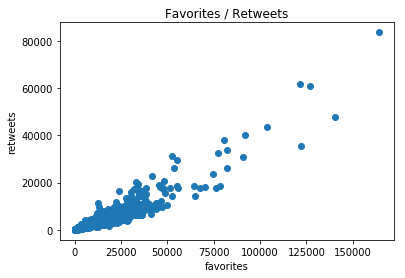

In [34]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.scatter(df_clean['favorite_count'], df_clean['retweet_count'])
plt.xlabel('favorites')
plt.ylabel('retweets')
plt.title('Favorites / Retweets')
plt.savefig('scatter.')